In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import plotting as plot
import fitting_output as fit_out

## Directory set up

The 'head_directory_name' is the results output directory, with a sub directory of the number of structures fitted, i.e. where your data is saved for each fit of that type. For example if you have fit 5 structures, your data would likely be in 'results/5_fit'. This can be different if you have changed the default location. The example here shows the results saved in 'partial+ri'.

The 'plot_directory_name' is the name of the sub directory where you wish to save your plots.

In [2]:
# Create plots sub directory
head_directory_name = 'results/partial+ri'
plot_directory_name = 'plots'
output_directory = fit_out.create_directory(head_directory_name, plot_directory_name)

## Ploting the $\chi^{2}$ errors of each fit (NB: >1 fit only)


Firstly the errors are read in from the sub directories within the 'head_directory_name' directory and stored in a dictionary, converting the error to a float and using the sub directory names as the structure numbers (x-axis labels) by removing the leading head directory path and error file extention. This won't work for a directory tree, only for a depth of 1.

In [3]:
error_dict = plot.setup_error_dict(head_directory_name)

The following plots the errors in the dictionary with lables and saves them to the plots output directory. There are options to change the title and degree of rotaion on the x-axis labels. You can also chose whether to save the plot or not. Further editing and formatting can be done by changing the 'plot_errors' function in 'plotting.py'.

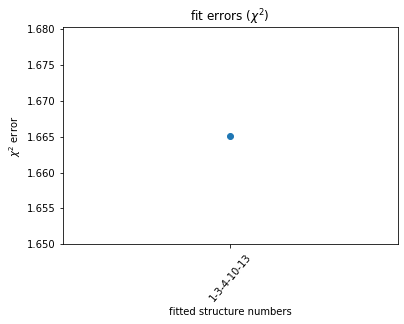

In [4]:
plot.plot_errors(error_dict, output_directory, xlabel_rotation=50, title='default', save=True)

## Plotting the potential parameters for each fit (NB: >1 fit only)

Firstly the fitted potential parameters are read in as a dictionary from each structure's 'potentials.json' file. These are edited to include the structure numbers (it was fitted to), then appended to a list of potential dictionaries. These dictionaries are then combined to have all parameters for each fit in one dictionary, where the keys are the potential parameter name and the values are tuples containing structure number and value. These are then plotted in individual plots by potential parameter.

In [5]:
list_of_potential_dicts = plot.setup_potential_dicts(head_directory_name)

In [6]:
potentials_dict = {}
for key in list_of_potential_dicts[0].keys():
    potentials_dict[key] = [potentials_dict[key] for potentials_dict in list_of_potential_dicts]

The following plots the potential parameters of ech fit in the dictionary with lables and saves them to the plots output directory. There are options to change the title and degree of rotaion on the x-axis labels. You can also chose whether to save the plot or not. Further editing and formatting can be done by changing the 'plot_parameters' function in 'plotting.py'.

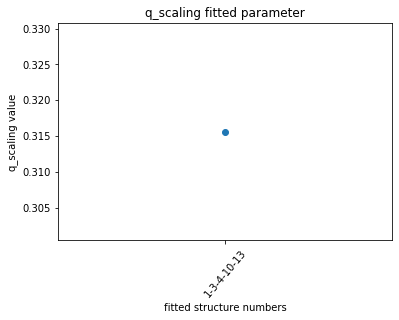

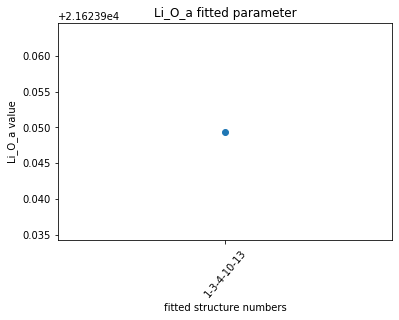

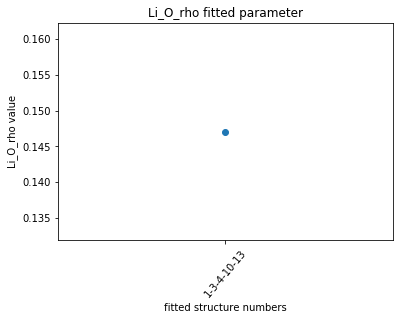

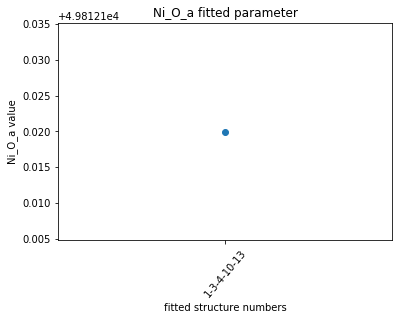

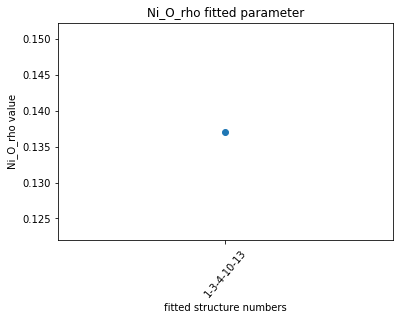

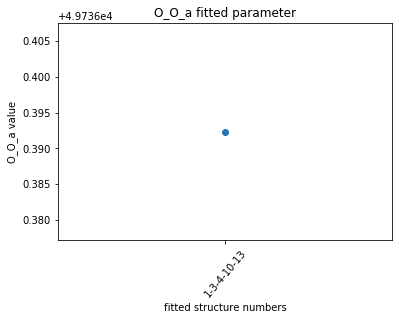

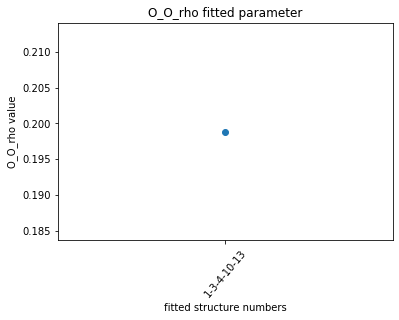

In [7]:
plot.plot_parameters(potentials_dict, output_directory, xlabel_rotation=50, title='default', save=True)

## Plot forces and stress tensors (NB: for individual fits)

The 'local_directory' is the individual fit directory in a series of fits, or the singular fit directory. The fores and stress tensors are then read in from the directory for the dft structures and those from the fitted potential parameters (ip).


In [8]:
local_directory = "1-3-4-10-13"
for structure in sorted(glob.glob('{}/{}'.format(head_directory_name, local_directory))):
    dft_forces = np.loadtxt('{}/dft_forces.dat'.format(structure), delimiter=' ')
    ip_forces = np.loadtxt('{}/ip_forces.dat'.format(structure), delimiter=' ')
    dft_stresses = np.loadtxt('{}/dft_stresses.dat'.format(structure), delimiter=' ')
    ip_stresses = np.loadtxt('{}/ip_stresses.dat'.format(structure), delimiter=' ')

The following plots the forces acting on each atom (in x,y,z) for each structure in the fit and saves the plot to the plots output directory. There are options to change the alpha (sets the transparency of plot points) and you can also chose whether to save the plot or not. This is saved to the plots output directory with the file name in the format [local_directory]\_forces.png. Further editing and formatting can be done by changing the 'plot_forces' function in 'plotting.py'.

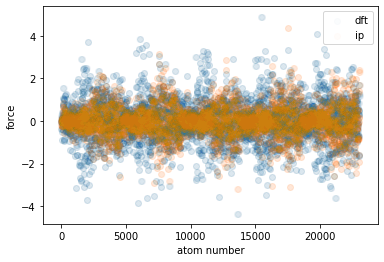

In [9]:
plot.plot_forces(dft_forces, ip_forces, output_directory, local_directory, alpha=0.02, save=True)

The following plots the stress tensors acting on system for each structure in the fit and saves the plot to the plots output directory. There is an option to chose whether to save the plot or not. This is saved to the plots output directory with the file name in the format [local_directory]\_stresses.png. Further editing and formatting can be done by changing the 'plot_stresses' function in 'plotting.py'. The $\chi^{2}$ error is printed on the plot, the position of which might need to be adjusted. Due to how the plots are made, the legend is done manually, but can be adjusted.

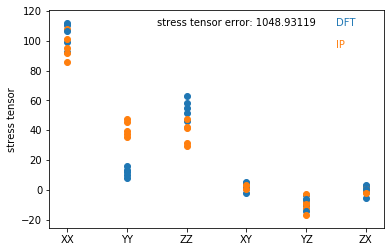

In [10]:
plot.plot_stresses(dft_stresses, ip_stresses, output_directory, local_directory, save=True)

Below just checks that the total $\chi^{2}$ value is equal to the sum of the forces and stress tensor parts. There is scaling on the stress tensors, so this must be taken into account. If this doesn't sum to the total error then you will need to go back through and check for an error.

In [11]:
force_diff = np.sum((dft_forces - ip_forces)**2)/ dft_forces.size
stress_diff = np.sum((dft_stresses - ip_stresses)**2)/ 6
force_diff+(stress_diff*0.001)

1.6651455945623894